In [2]:
import pandas as pd
import numpy as np 

#visuzalize
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

In [8]:
df = pd.read_csv("../DataSet/data.csv") 

#Dropping the 'id' column from the datase
df = df.drop('id', 1)
df = df.drop("Unnamed: 32", 1) #delete id column
#Mapping M to 1 and B to 0 in the output Label DataFrame
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})


In [9]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
#split Data into training and test (70% and 30% )
data_train, data_test = train_test_split(df, test_size = 0.3, random_state=1)

#train data
X_train = data_train.loc[:,'radius_mean' : 'fractal_dimension_worst']
y_train = data_train.loc[:,['diagnosis']]

#Testing Data
X_test=data_test.loc[:,'radius_mean' : 'fractal_dimension_worst']
y_test=data_test.loc[:,['diagnosis']]

#Converting Traing and Test Data to numpy array
X_train=np.asarray(X_train)
y_train=np.asarray(y_train)
X_test=np.asarray(X_test)
y_test=np.asarray(y_test)

In [33]:
#Function to initialize the weights and bias
def initialize(m):
    
    w = np.zeros((m,1))
    b = 0
    
    return w , b
    
#Function to calculate sigmoid of x    
def sigmoid(X):
    return 1/(1 + np.exp(- X))    


#Function for doing forward and back propogation
def propogate(X, Y, w, b):
    
    m = X.shape[1] #Number of training examples

    #Forward Propogation, calculating the cost
    Z = np.dot(w.T, X) + b;    
    A = sigmoid(Z)
    cost= -(1/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
    
    #Back Propogation , calculating the gradients
    dw = (1/m)* np.dot(X, (A-Y).T)
    db = (1/m)* np.sum(A-Y)
    
    grads= {"dw" : dw, "db" : db}
    
    return grads, cost

#Function for performing Grdient Descent
def optimize(X, Y, w, b, num_of_iterations, alpha):
    
    costs=[] 
    
    for i in range(num_of_iterations):
 
        grads, cost = propogate(X, Y, w, b)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - alpha * dw
        b = b - alpha * db
        
        #Storing tthe cost at interval of every 10 iterations
        if i% 10 == 0:
            costs.append(cost)
            print("cost after %i iteration : %f" % (i, cost))
            
            
    parameters = {"w":w, "b":b}
    grads = {"dw":dw, "db":db}
    
    
    return parameters, grads, costs


#Function for doing the predictions on the data set (mapping probabilities to 0 or 1)
def predict(X, w, b):
    
    m = X.shape[1] #Number of training examples
    
    y_prediction =  np.zeros((1,m))
    
    w = w.reshape(X.shape[0], 1)
    
    A=sigmoid(np.dot(w.T, X)+b)
    
    
    for i in range(A.shape[1]):
        
        if(A[0,i]<0.5):
            y_prediction[0,i]=0
        else:
            y_prediction[0,i]=1
            
    
    return y_prediction


#Function for calculating the Logistic Regression Model
def model(Xtrain, Ytrain, num_of_iterations, alpha):
    
    dim = Xtrain.shape[0] #Number of features
    
    w,b = initialize(dim)
    
    parameters, grads, costs = optimize(Xtrain, Ytrain, w, b, num_of_iterations, alpha) 
    
    w = parameters["w"]
    b = parameters["b"]
        
    
    d={"w":w, "b":b, "costs": costs}
    
    return d
def accuracy(X, w, b, y):
    y_predict = predict(X, w, b)
    return 100 - np.mean(np.abs(y_predict - y.T)) * 100


In [26]:
train = model(X_train.T, y_train.T, num_of_iterations=10000, alpha=0.000001)

teration : 0.301261
cost after 4600 iteration : 0.301098
cost after 4610 iteration : 0.300935
cost after 4620 iteration : 0.300772
cost after 4630 iteration : 0.300610
cost after 4640 iteration : 0.300449
cost after 4650 iteration : 0.300288
cost after 4660 iteration : 0.300128
cost after 4670 iteration : 0.299968
cost after 4680 iteration : 0.299809
cost after 4690 iteration : 0.299650
cost after 4700 iteration : 0.299491
cost after 4710 iteration : 0.299334
cost after 4720 iteration : 0.299176
cost after 4730 iteration : 0.299019
cost after 4740 iteration : 0.298863
cost after 4750 iteration : 0.298707
cost after 4760 iteration : 0.298552
cost after 4770 iteration : 0.298397
cost after 4780 iteration : 0.298242
cost after 4790 iteration : 0.298088
cost after 4800 iteration : 0.297935
cost after 4810 iteration : 0.297782
cost after 4820 iteration : 0.297629
cost after 4830 iteration : 0.297477
cost after 4840 iteration : 0.297325
cost after 4850 iteration : 0.297174
cost after 4860 it

In [27]:
costs = train["costs"]
w = train["w"]
b = train["b"]

Text(0, 0.5, 'Cost')

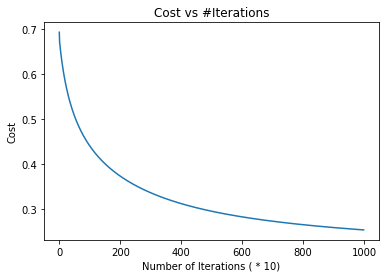

In [29]:
plt.plot(costs)
plt.title("Cost vs #Iterations")
plt.xlabel("Number of Iterations ( * 10)")
plt.ylabel("Cost")

In [34]:
print("Train accuracy: {}%".format(accuracy(X_train.T, w, b, y_train)))

Train accuracy: 91.95979899497488%


In [35]:
print("Train accuracy: {}%".format(accuracy(X_test.T, w, b, y_test)))

Train accuracy: 91.81286549707602%
